<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



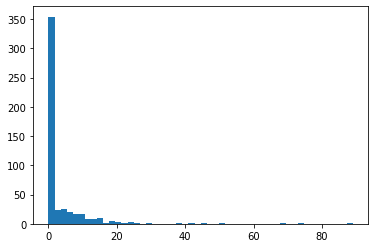

In [3]:
plt.hist(data.CRIM, 50)
plt.show()
# График принимает непрерывные значения, получившее распределение похоже на экспоненциальное

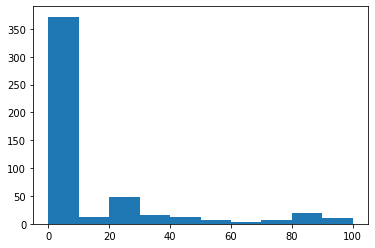

In [4]:
plt.hist(data.ZN, 10)
plt.show()
# График принимает дискретные значения, получившее распределение 
# с большой натяжком может быть похоже на геометрическое

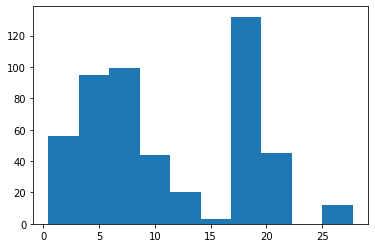

In [6]:
plt.hist(data.INDUS, 10)
plt.show()
# В данном графике увидеть какое-либо распределение не могу.

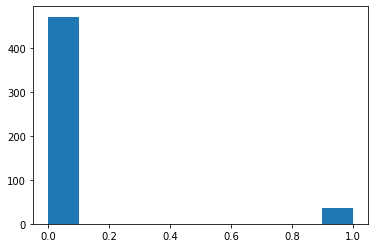

In [7]:
plt.hist(data.CHAS, 10)
plt.show()
# Фактически это распределение Бернулли

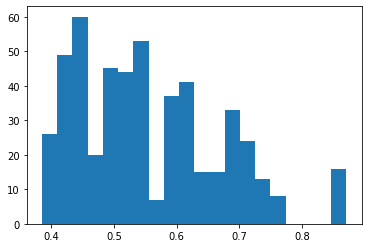

In [8]:
plt.hist(data.NOX, 20)
plt.show()
# С большой натяжкой можно считать, что это логнормальное распределение

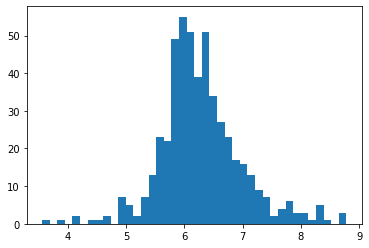

In [9]:
plt.hist(data.RM, 40)
plt.show()
# Распределение похоже на нормальное

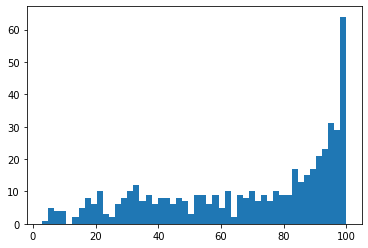

In [10]:
plt.hist(data.AGE, 50)
plt.show()
# Распределение похоже на экспоненциальное

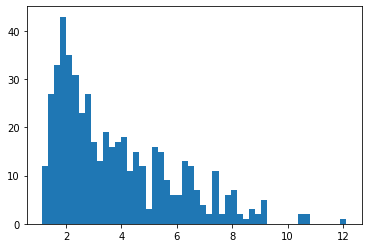

In [11]:
plt.hist(data.DIS, 50)
plt.show()
# Распределение похоже на логнормальное

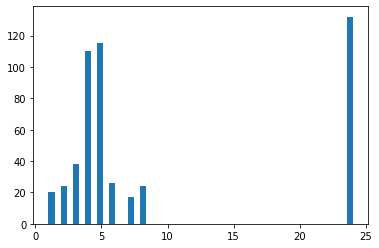

In [12]:
plt.hist(data.RAD, 50)
plt.show()
# В данном графике увидеть какое-либо распределение не могу.

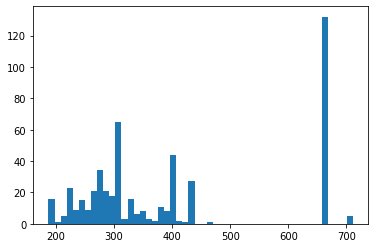

In [13]:
plt.hist(data.TAX, 50)
plt.show()
# В данном графике увидеть какое-либо распределение не могу.

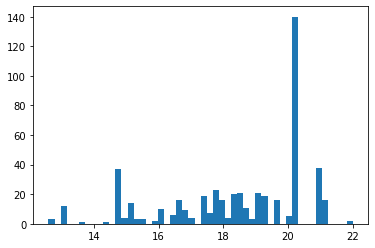

In [14]:
plt.hist(data.PTRATIO, 50)
plt.show()
# В данном графике увидеть какое-либо распределение не могу.

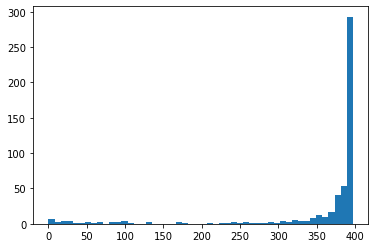

In [15]:
plt.hist(data.B, 50)
plt.show()
# Распределение похоже на экспоненциальное

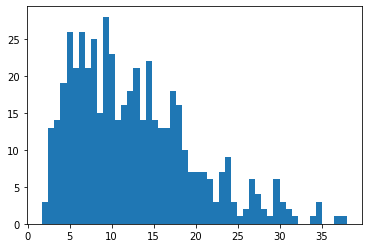

In [16]:
plt.hist(data.LSTAT, 50)
plt.show()
# Распределение похоже на логнормальное

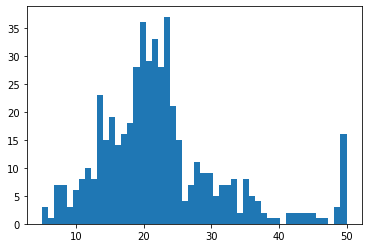

In [17]:
plt.hist(data.MEDV, 50)
plt.show()
# В данном графике увидеть какое-либо распределение не могу.

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующие атрибуты с ценой на дома (MEDV)

In [18]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# Максимально положительно коррелирующий атрибут с MEDV это RM (среднее количество комнат на одно жилище)
# Максимально отрицательно коррелирующий атрибут с MEDV это LSTAT (процент населения с низким статусом)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

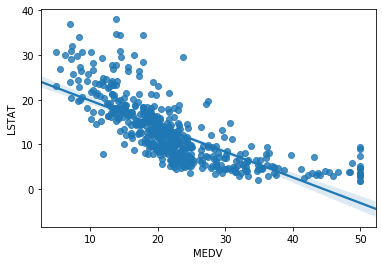

In [19]:
sns.regplot(x=data['MEDV'], y=data['LSTAT'], data=data, fit_reg=True)



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [20]:
MEDV = np.array(data['MEDV']).reshape(-1,1)
LSTAT = np.array(data['LSTAT']).reshape(-1,1)

In [21]:
# Разделяем данные на 80% тренировочных и 20% тестовых
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(
    MEDV,
    LSTAT,
    test_size = 0.2
)

In [22]:
# Обучение модели
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Ошибка модели на тестовых данных
model.score(X_test, y_test)

0.5024240578258685

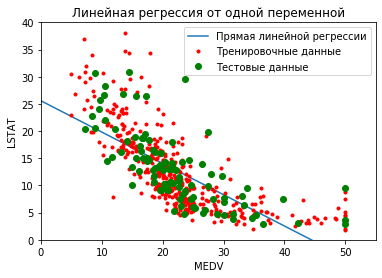

In [24]:
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(0, 80, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0, 55)
plt.ylim(0, 40)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [25]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [26]:
data.cov().style.background_gradient().set_precision(4)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,2041,1101,995.9,1061,1657,1108,370.9,1009,1615,1613
SD of Ladder,1101,2041,173.7,1260,1220,512.4,506.9,797.8,1255,1208
Positive affect,995.9,173.7,2015,785.2,778.3,1374,405.3,715.1,586.1,647.9
Negative affect,1061,1260,785.2,2015,1253,866.9,309.2,681.5,1051,944.8
Social support,1657,1220,778.3,1253,2015,904.5,230.7,891.5,1509,1472
Freedom,1108,512.4,1374,866.9,904.5,2015,736.3,987.3,800.9,821.4
Corruption,370.9,506.9,405.3,309.2,230.7,736.3,1838,511.3,368.3,233
Generosity,1009,797.8,715.1,681.5,891.5,987.3,511.3,2015,949,836.3
Log of GDP per capita,1615,1255,586.1,1051,1509,800.9,368.3,949,1938,1614
Healthy life expectancy,1613,1208,647.9,944.8,1472,821.4,233,836.3,1614,1888


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [27]:
missing = [(i,j) for i,j in zip(*np.where(pd.isnull(data)))]
print(f'Положение в таблице отсутствующих значений (номер строки, номер столбца): {missing}')
print(f'Количество отсутствющих значений: {len(missing)}')
print(f'Количество строк с отсутствующими значениями: {len(set([i for i,j in missing]))}')

Положение в таблице отсутствующих значений (номер строки, номер столбца): [(20, 7), (24, 9), (24, 10), (27, 7), (28, 3), (28, 4), (28, 5), (28, 6), (28, 7), (28, 8), (36, 7), (45, 10), (50, 7), (63, 9), (63, 10), (75, 10), (86, 7), (92, 7), (100, 7), (109, 10), (111, 9), (134, 10), (148, 9)]
Количество отсутствющих значений: 23
Количество строк с отсутствующими значениями: 16


In [28]:
# Удаляем отсутствующие значения
data_correction = data.dropna()

Сколько стран в выборке? Написать ответ. 

In [29]:
print(f'В выборке до удаления строк, содержащих пустые значения, {len(data.iloc[:,0].unique())} стран')
print(f'В выборке после удаления строк, содержащих пустые значения, {len(data_correction.iloc[:,0].unique())} стран')

В выборке до удаления строк, содержащих пустые значения, 156 стран
В выборке после удаления строк, содержащих пустые значения, 140 стран


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [30]:
data_correction.corr().style.background_gradient().set_precision(4)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1,0.556,0.5119,0.5397,0.8334,0.5464,0.2244,0.4857,0.8206,0.8267
SD of Ladder,0.556,1,0.09033,0.6327,0.6001,0.2502,0.2533,0.3863,0.664,0.6376
Positive affect,0.5119,0.09033,1,0.3519,0.4333,0.6966,0.2259,0.4171,0.3108,0.339
Negative affect,0.5397,0.6327,0.3519,1,0.6714,0.4159,0.1665,0.3505,0.5658,0.5071
Social support,0.8334,0.6001,0.4333,0.6714,1,0.4786,0.1489,0.4481,0.8019,0.7553
Freedom,0.5464,0.2502,0.6966,0.4159,0.4786,1,0.4076,0.4982,0.3859,0.4239
Corruption,0.2244,0.2533,0.2259,0.1665,0.1489,0.4076,1,0.2811,0.1861,0.149
Generosity,0.4857,0.3863,0.4171,0.3505,0.4481,0.4982,0.2811,1,0.4598,0.4531
Log of GDP per capita,0.8206,0.664,0.3108,0.5658,0.8019,0.3859,0.1861,0.4598,1,0.8736
Healthy life expectancy,0.8267,0.6376,0.339,0.5071,0.7553,0.4239,0.149,0.4531,0.8736,1


In [ ]:
# 1. Показатели Ladder, Social support, Log of GDP per capita, Healthy life expectancy 
# достаточно сильно коррелируют друг с другом (коэффициенты корреляции более 75%)
# Среди других показателей такой высокой корреляции не наблюдается.
# 2. Показатели Corruption и Generosity слабо коррелирует с другими показателями.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [31]:
# Кубик состоит 6 граней с цифрами от 1 до 6
cube = np.random.randint(6, size=10) + 1
cube

array([3, 3, 5, 6, 3, 4, 1, 5, 4, 5])

<function matplotlib.pyplot.show(*args, **kw)>

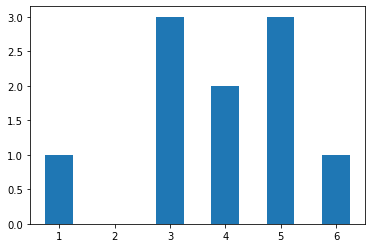

In [32]:
# График указывает распределение  выпадения кубика на той или иной цифре
plt.hist(cube, bins=np.arange(1,8)-0.5, rwidth=0.5)
plt.show
# График принимает дискретное значение, но увидеть здесь распределение не получится

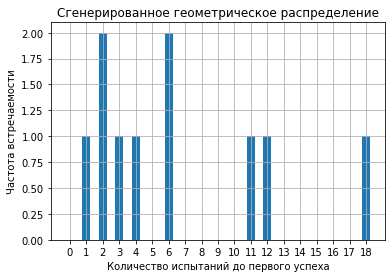

In [33]:
# По идее, если мы будем бросать кубик до тех пор, пока не выпадет нужное нам число, 
# то это будет геометрическое распределение, но увидеть это с 10 подбрасываниями не получится.
import random
random.seed(1)

distribution = stats.geom.rvs(size=10, p=1/6) 

pd.DataFrame(distribution).hist(range=(-0.5,max(distribution)+0.5)
                                    , bins=max(distribution)+1, rwidth=0.5)
plt.xlabel('Количество испытаний до первого успеха')
plt.ylabel('Частота встречаемости')
plt.xticks(np.arange(0, max(distribution)+1, step=1)) # Чтобы каждое целое число было отражено на графике
plt.title('Сгенерированное геометрическое распределение')
plt.show()

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

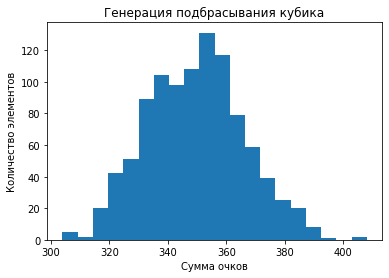

In [34]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums])

for i in range(number_of_sums):
    X1[i] = np.sum(np.random.randint(6, size=100) + 1) # Сумма очков кубика при 100 подбрасываний
plt.hist(X1, 20)
plt.xlabel('Сумма очков')
plt.ylabel('Количество элементов')
plt.title('Генерация подбрасывания кубика')
plt.show()

In [ ]:
# Так как сумма это дискретная величина, то можно считать, что получившееся распределение это распределение Пуассона.